# Integrated Simulations

In [1]:
import os; from os import listdir; from os.path import isfile, join
import re  
from skimage.io import imread
from skimage.exposure import rescale_intensity
import numpy as np 
from tqdm.notebook import tqdm
from timeit import default_timer as timer
import scipy
import pandas as pd
import shutil
import pathlib
import sys
import seaborn as sns
import rsnapsim as rss
import scipy.stats as stats
import matplotlib.pyplot as plt 
from matplotlib_scalebar.scalebar import ScaleBar
from matplotlib.patches import Rectangle
from matplotlib.patches import ConnectionPatch
from matplotlib.ticker import FormatStrFormatter

In [2]:
plt.style.use("dark_background")

In [3]:
# Defining directories
current_dir = pathlib.Path().absolute()
sequences_dir = current_dir.parents[1].joinpath('DataBases','gene_files')
video_dir = current_dir.parents[1].joinpath('DataBases','videos_for_sim_cell')
rsnaped_dir = current_dir.parents[1].joinpath('rsnaped')
gene_file = current_dir.parents[1].joinpath('DataBases','gene_files','KDM5B_withTags.txt')
masks_dir = current_dir.parents[1].joinpath('DataBases','masks_for_sim_cell')

In [4]:
sequences_dir

PosixPath('/home/luisub/Desktop/rsnaped/DataBases/gene_files')

In [5]:
# Importing rSNAPed
sys.path.append(str(rsnaped_dir))
import rsnaped as rsp

In [6]:
rsp.Banner().print_banner()

 
  ██████╗░░██████╗███╗░░██╗░█████╗░██████╗░███████╗██████╗░ 
  ██╔══██╗██╔════╝████╗░██║██╔══██╗██╔══██╗██╔════╝██╔══██╗ 
  ██████╔╝╚█████╗░██╔██╗██║███████║██████╔╝█████╗░░██║░░██║ 
  ██╔══██╗░╚═══██╗██║╚████║██╔══██║██╔═══╝░██╔══╝░░██║░░██║ 
  ██║░░██║██████╔╝██║░╚███║██║░░██║██║░░░░░███████╗██████╔╝ 
             by : L. Aguilera, T. Stasevich, and B. Munsky 


In [7]:
# These are the parameters that need to be tested. 
number_of_simulated_cells = 1     # PLEASE TEST MIN 1 MAX 10
number_spots_per_cell = 80           # PLEASE TEST MIN 5 MAX 200
simulation_time_in_sec = 100          # PLEASE TEST MIN 10 MAX 100
step_size_in_sec = 1

min_percentage_time_tracking = 0.3   # (normalized) minimum time to consider a trajectory.
average_cell_diameter = 400

In [8]:
diffusion_coefficient = 0.05       # This value must have units of micrometers_square_per_seconds
microns_per_pixel = 0.13

In [9]:
intensity_calculation_method = 'gaussian_fit'  # options are : 'total_intensity' and 'disk_donut' 'gaussian_fit'
mask_selection_method = 'max_area' # options are : 'max_spots' and 'max_area' 
use_optimization_for_tracking = 1 # 0 not using, 1 is using optimization

selected_channel_tracking = 0
selected_channel_segmentation = 1

frame_selection_empty_video = 'gaussian' # Options are: 'constant' , 'shuffle' and 'loop' 'linear_interpolation', 'gaussian', 'poisson'
dataframe_format = 'long' # 'short'  'long'

store_videos_in_memory = False
save_as_gif = False 
show_plot = False  # Flag to show plots for the detection and tracking process.


In [10]:
spot_size = 7 # spot size for the simulation and tracking.
spot_sigma = 1
elongation_rate = 10
initiation_rate = 0.03
simulated_RNA_intensities_method = 'random'

In [11]:
basal_intensity_in_background_video = 10000
scale_intensity_in_base_video=False

In [12]:
intensity_scale_ch0 = 0.5
intensity_scale_ch1 = 0.5
intensity_scale_ch2 = None

In [13]:
particle_detection_size = spot_size

In [14]:
select_background_cell_index = 0 # Integer in range 0 to 8, or use None to select a random value. 
perform_video_augmentation = False 

## Running the simulations

In [15]:
list_videos_sim, list_dataframe_simulated_cell, merged_dataframe_simulated_cells, ssa_trajectories, list_files_names, video_path, dataframe_path = rsp.simulate_cell( video_dir, 
                                                                        list_gene_sequences = gene_file,
                                                                        list_number_spots= number_spots_per_cell,
                                                                        list_target_channels_proteins = 1,
                                                                        list_target_channels_mRNA = 0, 
                                                                        list_diffusion_coefficients=diffusion_coefficient,
                                                                        list_elongation_rates=elongation_rate,
                                                                        list_initiation_rates=initiation_rate,
                                                                        masks_dir=masks_dir, 
                                                                        list_label_names=1,
                                                                        number_cells = number_of_simulated_cells,
                                                                        simulation_time_in_sec = simulation_time_in_sec,
                                                                        step_size_in_sec = step_size_in_sec,
                                                                        save_as_gif = save_as_gif,
                                                                        frame_selection_empty_video=frame_selection_empty_video,
                                                                        spot_size = spot_size,
                                                                        spot_sigma = spot_sigma,
                                                                        intensity_scale_ch0 = intensity_scale_ch0,
                                                                        intensity_scale_ch1 = intensity_scale_ch1,
                                                                        intensity_scale_ch2 = intensity_scale_ch2,
                                                                        dataframe_format = 'long',
                                                                        simulated_RNA_intensities_method=simulated_RNA_intensities_method,
                                                                        store_videos_in_memory= store_videos_in_memory,
                                                                        scale_intensity_in_base_video=scale_intensity_in_base_video,
                                                                        basal_intensity_in_background_video=basal_intensity_in_background_video,
                                                                        microns_per_pixel=microns_per_pixel,
                                                                        select_background_cell_index=select_background_cell_index,
                                                                        perform_video_augmentation=perform_video_augmentation)

The simulation dataframes are stored here: /home/luisub/Desktop/rsnaped/notebooks/Simulated_Cell/temp_simulation/bg_gaussian_rna_random_ke_10_ki_0_03_kd_0_05_spots_80_time_100_cells_1_int0_0_5_int1_0_5_int2_None/dataframe_bg_gaussian_rna_random_ke_10_ki_0_03_kd_0_05_spots_80_time_100_cells_1_int0_0_5_int1_0_5_int2_None
Time to generate simulated data: 19  sec


In [16]:
number_images = len(list_videos_sim)

In [17]:
# # Reads the folder with the results and import the simulations as lists
list_files_names = sorted([f for f in listdir(video_path) if isfile(join(video_path, f)) and ('.tif') in f], key=str.lower)  # reading all tif files in the folder
list_files_names.sort(key=lambda f: int(re.sub('\D', '', f)))  # sorting the index in numerical order
path_files = [ str(video_path.joinpath(f).resolve()) for f in list_files_names ] # creating the complete path for each file
path_files.sort(key=lambda f: int(re.sub('\D', '', f)))  # sorting the index in numerical order

# # Reading the microscopy data
number_images = number_of_simulated_cells
number_images

1

# Display simulations for single time point

## <span style="color:lightgreen">Channel 1</span>

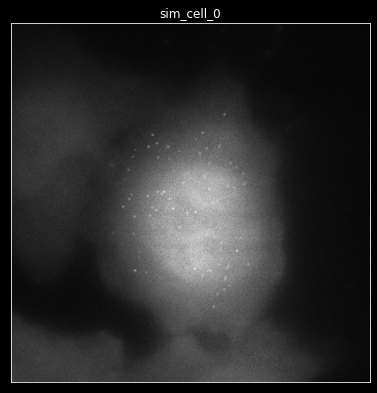

In [18]:
# Showing the simulated images
list_videos_sim = [imread(f)[:,:,:,:] for f in  path_files] # List with all the videos
rsp.VisualizerImage(list_videos_sim,list_files_names=list_files_names,selected_channel =1,selected_time_point= 0,normalize=0,individual_figure_size=7).plot()
#del list_videos

In [19]:
list_DataFrame_particles_intensities, list_array_intensities, list_time_vector, list_selected_mask = rsp.image_processing( files_dir_path_processing=video_path,
                                                                                                                            particle_size=particle_detection_size,
                                                                                                                            selected_channel_tracking = selected_channel_tracking,
                                                                                                                            selected_channel_segmentation = selected_channel_segmentation,
                                                                                                                            intensity_calculation_method =intensity_calculation_method, 
                                                                                                                            mask_selection_method = mask_selection_method,
                                                                                                                            show_plot=show_plot,
                                                                                                                            use_optimization_for_tracking=use_optimization_for_tracking,
                                                                                                                            real_positions_dataframe = list_dataframe_simulated_cell,
                                                                                                                            average_cell_diameter=average_cell_diameter,
                                                                                                                            print_process_times=True,
                                                                                                                            min_percentage_time_tracking=min_percentage_time_tracking,
                                                                                                                            dataframe_format=dataframe_format)

mask time: 9  sec
The number of detected trajectories is:  81
The selected intensity threshold is:  255.0 

tracking time: 7  sec
intensity calculation time: 3  sec
81
Progress:  1 / 1
Time to process data: 20  sec


In [20]:
list_DataFrame_particles_intensities[0].head()

,image_number,cell_number,particle,frame,red_int_mean,green_int_mean,blue_int_mean,red_int_std,green_int_std,blue_int_std,...,y,SNR_red,SNR_green,SNR_blue,background_int_mean_red,background_int_mean_green,background_int_mean_blue,background_int_std_red,background_int_std_green,background_int_std_blue
0,0,0,0,0,1407.89,4006.45,0.0,6.91,-1.099444e+08,0.0,...,131,0.89,1.83,0.0,1220.90,3374.83,0.0,84.71,344.41,0.0
1,0,0,0,1,1304.35,4020.22,0.0,204823.72,-2.705165e+07,0.0,...,131,0.95,2.15,0.0,1230.31,3341.97,0.0,78.02,315.23,0.0
2,0,0,0,2,1263.53,4029.96,0.0,62297.34,-3.571306e+07,0.0,...,131,0.48,1.96,0.0,1224.93,3383.80,0.0,80.28,329.44,0.0
3,0,0,0,3,1364.96,4365.35,0.0,291127.36,-2.967203e+07,0.0,...,138,0.81,1.80,0.0,1288.07,3670.56,0.0,95.10,385.76,0.0
4,0,0,0,4,1457.56,4527.73,0.0,-7.81,-2.722669e+07,0.0,...,139,0.34,1.76,0.0,1331.94,3816.80,0.0,101.79,402.84,0.0


In [21]:
def extract_positions_without_spots ( number_background_spots, original_image, mask, dataframe, selected_channel, spot_size, intensity_calculation_method):

    # Apply mask to image.
    img_removed_mask = rsp.MaskingImage(video=original_image,mask=mask).apply_mask()
    # Returns the pixel values for the image, removing the positions where spots are detected.
    image_without_spots = img_removed_mask[:,:,:,selected_channel].copy()
    for i in range (image_without_spots.shape[0]):
        x_values = dataframe.loc[(dataframe['frame']==i)]['x'].values
        y_values = dataframe.loc[(dataframe['frame']==i)]['y'].values
        image_without_spots[i]=rsp.Utilities.remove_spots_from_image(image_without_spots[i], x_values, y_values,spot_size)

    # section that detects pixels without zeros for all frames
    spot_count = 0
    background_pixel_trajectories_real = np.zeros((number_background_spots, original_image.shape[0])  )
    background_pixels_coordinates =  np.zeros((number_background_spots, 2))

    # selecting random spots that are not in a given spot.
    while spot_count < number_background_spots:
        test_pixel = np.random.randint(low=0, high=original_image.shape[1], size=(2), dtype=int)
        temp = image_without_spots[:,test_pixel[0],test_pixel[1]].flatten()
        if np.all(temp): # test if the pixel has any zeros
            background_pixel_trajectories_real [spot_count,:] = temp
            background_pixels_coordinates [spot_count,:] = test_pixel
            spot_count+=1

    # returning spots in the format 
    number_frames = original_image.shape[0]
    spot_positions_movement = np.zeros( (number_frames,number_background_spots,2 ) )
    temp_coord = np.zeros((number_background_spots,2))
    for t_p in range(number_frames):
        for i_p in range (0, number_background_spots):
            temp_coord [i_p,:]= background_pixels_coordinates[i_p,:]
        spot_positions_movement [t_p, :, :] = temp_coord 
        
    dataframe_particles_BG = rsp.Intensity(original_image, spot_positions_movement = spot_positions_movement, particle_size=spot_size, method =intensity_calculation_method , show_plot = 0, dataframe_format='long').calculate_intensity()[0]

    return dataframe_particles_BG, image_without_spots

In [22]:
selected_channel = 1
number_background_spots = 300
simulated_image = list_videos_sim[0]
df_sim = list_dataframe_simulated_cell[0].copy()
selected_mask= list_selected_mask[0].copy()
spot_size = particle_detection_size

dataframe_BG_simulated, simulated_image_without_spots = extract_positions_without_spots ( number_background_spots = number_background_spots, 
                                                                                                    original_image = simulated_image, 
                                                                                                    mask = selected_mask, 
                                                                                                    dataframe = df_sim, 
                                                                                                    selected_channel = selected_channel, 
                                                                                                    spot_size = spot_size, 
                                                                                                    intensity_calculation_method = intensity_calculation_method)


In [23]:
# Data simulated image -     BACKGROUND
int_BG_sim = rsp.Utilities.extract_field_from_dataframe( dataframe = dataframe_BG_simulated, selected_time = None, selected_field = 'green_int_mean',use_nan_for_padding=True)
mean_acf_bg_sim, err_acf_bg_sim, lags_sim_BG, _, _ = rsp.Covariance(intensity_array=int_BG_sim,step_size=1, max_lagtime= 500, show_plot= False,figure_size=(6,4)).calculate_autocovariance()
snr_BG_sim = rsp.Utilities.extract_field_from_dataframe( dataframe = dataframe_BG_simulated, selected_time = None, selected_field = 'SNR_green',use_nan_for_padding=True).flatten()

# Data simulated image -     SPOTS
int_sim = rsp.Utilities.extract_field_from_dataframe( dataframe = df_sim, selected_time = None, selected_field = 'green_int_mean',use_nan_for_padding=True)
snr_sim = rsp.Utilities.extract_field_from_dataframe( dataframe = df_sim, selected_time = None, selected_field = 'SNR_green',use_nan_for_padding=True).flatten()
mean_acf_sim, err_acf_sim, lags_sim, _, _=rsp.Covariance(dataframe_particles=df_sim,selected_field='green_int_mean',step_size=1, max_lagtime= 500, show_plot= False,figure_size=(6,4)).calculate_autocovariance()


nlags 100
The dwell (decorrelation) time is  1 seconds
nlags 100
The dwell (decorrelation) time is  29 seconds


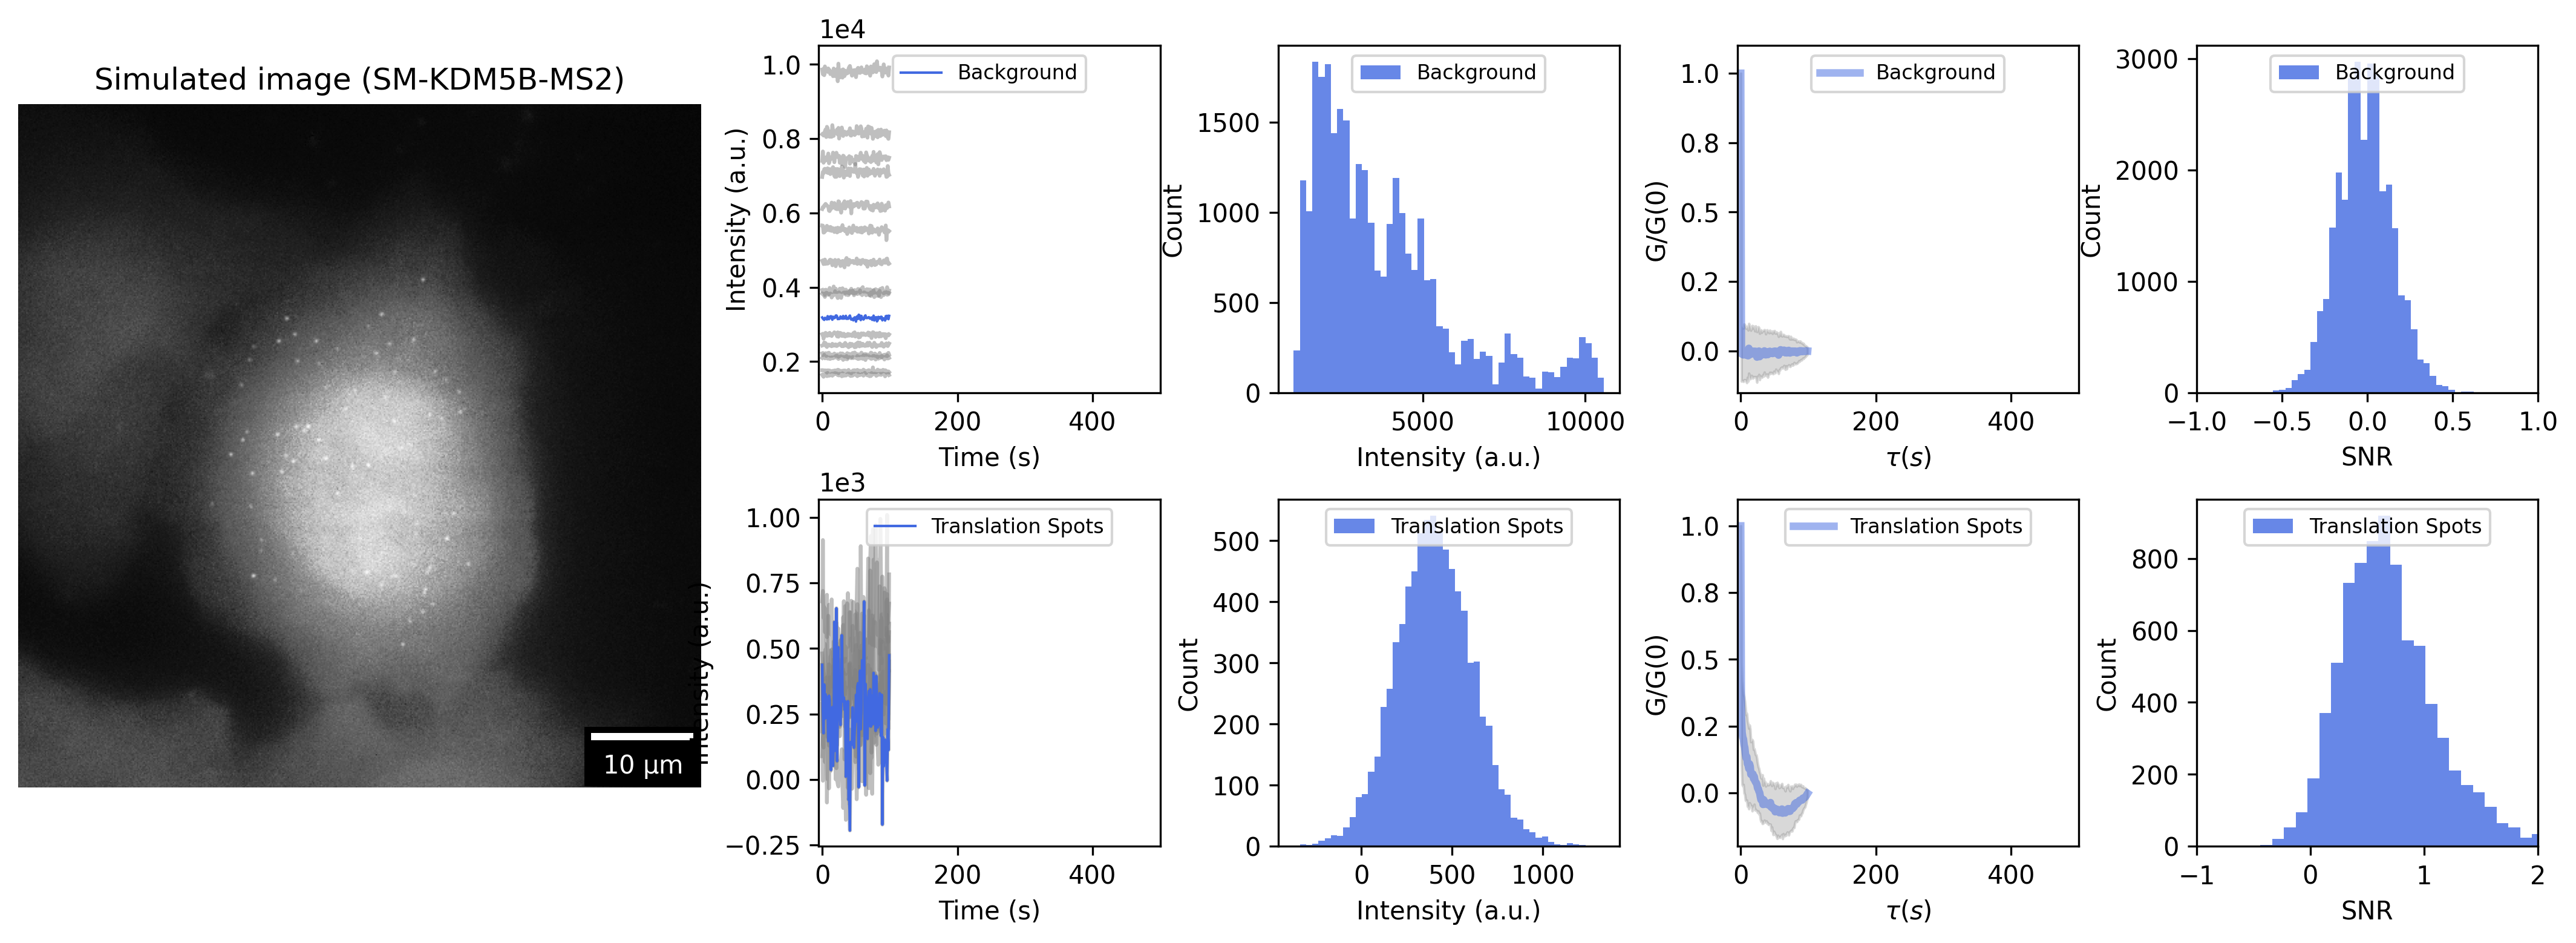

In [24]:
########################################################################################################################
########################################################################################################################
########################################################################################################################

# Plotting
widths = [2, 1, 1, 1,1]
heights = [ 1, 1]
plt.style.use(['default'])
labels_size = 10
legend_size = 8
fig = plt.figure(figsize=(14, 5),constrained_layout=True,dpi=300)
plt.tight_layout() 
gs = fig.add_gridspec(ncols=5, nrows=2, width_ratios=widths,height_ratios=heights)
selected_color = 'royalblue'

########################################################################################################################
########################################################################################################################
########################################################################################################################

# Cell
f_ax1 = fig.add_subplot(gs[:, 0]); f_ax1.axis('off')
f_ax1.imshow(simulated_image[0,:,:,selected_channel],cmap='Greys_r')
f_ax1.set_title("Simulated image (SM-KDM5B-MS2)")
scalebar = ScaleBar(dx = microns_per_pixel, units= 'um', length_fraction=0.2,location='lower right',box_color='k',color='w')
f_ax1.add_artist(scalebar)

########################################################################################################################
########################################################################################################################
########################################################################################################################

# Time courses
f_ax2 = fig.add_subplot(gs[0, 1]); 
f_ax2.plot(int_BG_sim[0:-1:20,:].T,'grey',alpha = .5)
f_ax2.plot(int_BG_sim[1,:],'-', linewidth = 1, color = selected_color, label = 'Background')
f_ax2.set_xlabel('Time (s)', size=labels_size)
f_ax2.set_ylabel('Intensity (a.u.)', size=labels_size)
f_ax2.set_xlim((-5, 500))
f_ax2.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
f_ax2.legend(loc='upper center', prop={'size': legend_size})

# Background Distribution
f_ax3 = fig.add_subplot(gs[0, 2]); 
f_ax3.hist(int_BG_sim.flatten(), bins=50, alpha=0.8, stacked=True, histtype='barstacked',color=selected_color,linewidth=1, label="Background")
f_ax3.set_xlabel("Intensity (a.u.)", size=labels_size)
f_ax3.set_ylabel("Count", size=labels_size)
f_ax3.legend(loc='upper center', prop={'size': legend_size})

# Background ACF
f_ax4 = fig.add_subplot(gs[0, 3]); 
f_ax4.plot(lags_sim_BG,mean_acf_bg_sim, alpha=0.5,color=selected_color, linewidth=3, label='Background')
f_ax4.fill_between(lags_sim_BG, mean_acf_bg_sim - err_acf_bg_sim, mean_acf_bg_sim + err_acf_bg_sim, color='grey', alpha=0.3)
f_ax4.set_ylim((-0.15, 1.1))
f_ax4.set_xlim((-5, 500))
f_ax4.set_xlabel(r'$\tau (s)$', size=labels_size)
f_ax4.set_ylabel(r'G/G(0)', size=labels_size)
f_ax4.yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
f_ax4.legend(loc='upper center', prop={'size': legend_size})

# Background SNR
f_ax5 = fig.add_subplot(gs[0, 4]); 
f_ax5.hist(snr_BG_sim, bins=40,histtype='barstacked', color=selected_color, linewidth=2, alpha=0.8, label="Background")
f_ax5.set_xlabel("SNR", size=labels_size)
f_ax5.set_ylabel("Count", size=labels_size)
f_ax5.legend(loc='upper center', prop={'size': legend_size})
f_ax5.set_xlim((-1, 1))

########################################################################################################################
########################################################################################################################
########################################################################################################################

# Trajectories spots
selected_trajectory = 10
f_ax6 = fig.add_subplot(gs[1, 1])
f_ax6.plot(int_sim[0:-1:10,:].T,'grey',alpha = .5)
f_ax6.plot(int_sim[selected_trajectory,:].T,'-', linewidth = 1, color = selected_color,label = 'Translation Spots')
f_ax6.set_xlabel('Time (s)', size=labels_size)
f_ax6.set_ylabel('Intensity (a.u.)', size=labels_size)
f_ax6.set_xlim((-5, 500))
f_ax6.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
f_ax6.legend(loc='upper center', prop={'size': legend_size})

# Spots Intensity Distribution
f_ax7 = fig.add_subplot(gs[1, 2]); 
f_ax7.hist(int_sim.flatten(), bins=50,histtype='barstacked',linewidth=2,color = selected_color, alpha=0.8, label="Translation Spots")
f_ax7.set_xlabel("Intensity (a.u.)", size=labels_size)
f_ax7.set_ylabel("Count", size=labels_size)
f_ax7.legend(loc='upper center', prop={'size': legend_size})

# ACF spots
f_ax8 = fig.add_subplot(gs[1, 3]); 
f_ax8.plot(lags_sim,mean_acf_sim, alpha=0.5,color=selected_color, linewidth=3, label='Translation Spots')
f_ax8.fill_between(lags_sim, mean_acf_sim - err_acf_sim, mean_acf_sim + err_acf_sim, color='grey', alpha=0.3)
f_ax8.set_ylim((-0.2, 1.1))
f_ax8.set_xlim((-5, 500))
f_ax8.set_xlabel(r'$\tau (s)$', size=labels_size)
f_ax8.set_ylabel(r'G/G(0)', size=labels_size)
f_ax8.yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
f_ax8.legend(loc='upper center', prop={'size': legend_size})

# Spots SNR
f_ax9 = fig.add_subplot(gs[1, 4]); 
f_ax9.hist(snr_sim, bins=40,histtype='barstacked',color=selected_color, linewidth=2, alpha=0.8, label="Translation Spots")
f_ax9.set_xlabel("SNR", size=labels_size)
f_ax9.set_ylabel("Count", size=labels_size)
f_ax9.legend(loc='upper center', prop={'size': legend_size})
f_ax9.set_xlim((-1, 2))

########################################################################################################################
########################################################################################################################
########################################################################################################################

plt.subplots_adjust(wspace=0.1, hspace=0.5)
name_figure = 'sim_cell.pdf'
#figure_directory = str(dropbox_address.joinpath(name_figure ) )
plt.tight_layout(pad=0.02) 
#plt.savefig(name_figure, transparent=True,dpi=300, format = 'pdf')
plt.show()

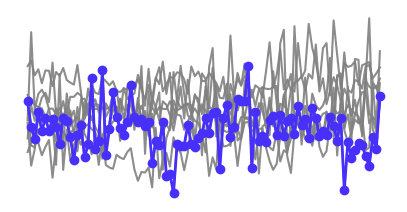

In [50]:
sel_col = '#4730FC'
# Pixel intensity distribution for the background
plt.style.use(['default'])
plt.figure(figsize=(5,2.5))
plt.plot(int_sim[0:-1:10,:].T,'grey',alpha = .9)
plt.plot(int_sim[selected_trajectory,:].T,'-', linewidth = 2, color = sel_col, marker = 'o' )
plt.yticks([])
plt.xticks([])
plt.axis('off')
plt.savefig('test.png', bbox_inches="tight", pad_inches = 0)

In [25]:
raise

RuntimeError: No active exception to reraise

# Real data

In [ ]:
real_video_path = current_dir.parents[1].joinpath('DataBases','KDM5B_Translation_SampleMovies')
real_videos_path_correct_format = rsp.convert_directory_to_standard_format(directory=real_video_path, time_position = 0, height_position = 2,  width_position = 3, channel_position = 1)

In [ ]:
# Reads the folder with the results and import the simulations as lists
list_files_names = sorted([f for f in listdir(real_videos_path_correct_format) if isfile(join(real_videos_path_correct_format, f)) and ('.tif') in f], key=str.lower)  # reading all tif files in the folder
list_files_names.sort(key=lambda f: int(re.sub('\D', '', f)))  # sorting the index in numerical order
path_files = [ str(real_videos_path_correct_format.joinpath(f).resolve()) for f in list_files_names ] # creating the complete path for each file
path_files.sort(key=lambda f: int(re.sub('\D', '', f)))  # sorting the index in numerical order
number_real_videos = len(path_files)
print(list_files_names)
print(path_files)

list_videos_real = [imread(f)[:,:,:,:] for f in  path_files] # List with all the videos

for i in range(number_real_videos):
    print(list_videos_real[0].shape)

In [ ]:
#rsp.Utilities.save_as_gif(list_videos_real[3], saved_file_name ='real_video', save_to_path=None, max_frames = 10)

In [ ]:

particle_detection_size = 5

intensity_calculation_method = 'gaussian_fit'  # options are : 'total_intensity' and 'disk_donut' 'gaussian_fit'
mask_selection_method = 'max_area' # options are : 'max_spots' and 'max_area' 
use_optimization_for_tracking = 1 # 0 not using, 1 is using optimization

selected_channel_tracking = 0
selected_channel_segmentation = 1

frame_selection_empty_video = 'gaussian' # Options are: 'constant' , 'shuffle' and 'loop' 'linear_interpolation', 'gaussian', 'poisson'
dataframe_format = 'long' # 'short'  'long'

store_videos_in_memory = False
save_as_gif = False 
show_plot = True  # Flag to show plots for the detection and tracking process.

average_cell_diameter = 200

min_percentage_time_tracking = 0.05

In [ ]:
# use pipeline to segment and detect spots
list_DataFrame_particles_intensities_real, list_array_intensities_real, list_time_vector_real, list_selected_mask_real = rsp.image_processing( files_dir_path_processing=real_videos_path_correct_format,
                                                                                                                            particle_size=particle_detection_size,
                                                                                                                            selected_channel_tracking = selected_channel_tracking,
                                                                                                                            selected_channel_segmentation = selected_channel_segmentation,
                                                                                                                            intensity_calculation_method =intensity_calculation_method, 
                                                                                                                            mask_selection_method = mask_selection_method,
                                                                                                                            show_plot=show_plot,
                                                                                                                            use_optimization_for_tracking=use_optimization_for_tracking,
                                                                                                                            average_cell_diameter=average_cell_diameter,
                                                                                                                            print_process_times=True,
                                                                                                                            min_percentage_time_tracking=min_percentage_time_tracking,
                                                                                                                            dataframe_format=dataframe_format)

# Image real data

In [ ]:
# Selecting a single cell to calculate its properties.
selected_real_cell = 3
number_background_spots = 300
selected_mask = list_selected_mask_real[selected_real_cell].copy()
selected_real_image = list_videos_real[selected_real_cell]
selected_channel = 1
df_real = list_DataFrame_particles_intensities_real[selected_real_cell]
spot_size = particle_detection_size

dataframe_BG, image_without_spots = extract_positions_without_spots ( number_background_spots = number_background_spots, 
                                                                                original_image = selected_real_image, 
                                                                                mask = selected_mask, 
                                                                                dataframe = df_real, 
                                                                                selected_channel = selected_channel, 
                                                                                spot_size = spot_size, 
                                                                                intensity_calculation_method = intensity_calculation_method)

In [ ]:

# Data real image -     BACKGROUND
int_green_channel_BG = rsp.Utilities.extract_field_from_dataframe( dataframe = dataframe_BG, selected_time = None, selected_field = 'green_int_mean',use_nan_for_padding=True)
mean_acf_bg_real, err_acf_bg_real, lags_real, _, _ = rsp.Covariance(intensity_array=int_green_channel_BG,step_size=10, max_lagtime= 200, show_plot= False,figure_size=(6,4)).calculate_autocovariance()
snr_BG = rsp.Utilities.extract_field_from_dataframe( dataframe = dataframe_BG, selected_time = None, selected_field = 'SNR_green',use_nan_for_padding=True).flatten()

# Data real image -     SPOTS
int_green_channel_real = rsp.Utilities.extract_field_from_dataframe( dataframe = df_real, selected_time = None, selected_field = 'green_int_mean',use_nan_for_padding=True)
snr_green_channel_real = rsp.Utilities.extract_field_from_dataframe( dataframe = df_real, selected_time = None, selected_field = 'SNR_green',use_nan_for_padding=True).flatten()
mean_acf_real, err_acf_real, lags_real, _, _ = rsp.Covariance(dataframe_particles=df_real,selected_field='green_int_mean',step_size=10, max_lagtime= 200, show_plot= False,figure_size=(6,4)).calculate_autocovariance()


In [ ]:
########################################################################################################################
########################################################################################################################
########################################################################################################################

# Plotting
widths = [2, 1, 1, 1,1]
heights = [ 1, 1]
plt.style.use(['default'])
labels_size = 10
legend_size = 8
fig = plt.figure(figsize=(14, 5),constrained_layout=True,dpi=300)
plt.tight_layout() 
gs = fig.add_gridspec(ncols=5, nrows=2, width_ratios=widths,height_ratios=heights)
selected_color = 'orangered'

########################################################################################################################
########################################################################################################################
########################################################################################################################

# Cell
f_ax1 = fig.add_subplot(gs[:, 0]); f_ax1.axis('off')
f_ax1.imshow(selected_real_image[0,:,:,selected_channel],cmap='Greys_r')
f_ax1.set_title("Real image (SM-KDM5B-MS2)")
scalebar = ScaleBar(dx = microns_per_pixel, units= 'um', length_fraction=0.2,location='lower right',box_color='k',color='w')
f_ax1.add_artist(scalebar)

########################################################################################################################
########################################################################################################################
########################################################################################################################

# Time courses
f_ax2 = fig.add_subplot(gs[0, 1]); 
f_ax2.plot(int_green_channel_BG[0:-1:20,:].T,'grey',alpha = .5)
f_ax2.plot(int_green_channel_BG[1,:],'-', linewidth = 1, color = selected_color, label = 'Background')
f_ax2.set_xlabel('Time (s)', size=labels_size)
f_ax2.set_ylabel('Intensity (a.u.)', size=labels_size)
f_ax2.set_xlim((-5, 200))
f_ax2.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
f_ax2.legend(loc='upper center', prop={'size': legend_size})

# Background Distribution
f_ax3 = fig.add_subplot(gs[0, 2]); 
f_ax3.hist(int_green_channel_BG.flatten(), bins=50, alpha=0.8, stacked=True, histtype='barstacked',color=selected_color,linewidth=1, label="Background")
f_ax3.set_xlabel("Intensity (a.u.)", size=labels_size)
f_ax3.set_ylabel("Count", size=labels_size)
f_ax3.legend(loc='upper center', prop={'size': legend_size})

# Background ACF
f_ax4 = fig.add_subplot(gs[0, 3]); 
f_ax4.plot(lags_real,mean_acf_bg_real, alpha=0.5,color=selected_color, linewidth=3, label='Background')
f_ax4.fill_between(lags_real, mean_acf_bg_real - err_acf_bg_real, mean_acf_bg_real + err_acf_bg_real, color='grey', alpha=0.3)
f_ax4.set_ylim((-0.15, 1.1))
f_ax4.set_xlim((-5, 2000))
f_ax4.set_xlabel(r'$\tau (s)$', size=labels_size)
f_ax4.set_ylabel(r'G/G(0)', size=labels_size)
f_ax4.yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
f_ax4.legend(loc='upper center', prop={'size': legend_size})

# Background SNR
f_ax5 = fig.add_subplot(gs[0, 4]); 
f_ax5.hist(snr_BG, bins=40,histtype='barstacked', color=selected_color, linewidth=2, alpha=0.8, label="Background")
f_ax5.set_xlabel("SNR", size=labels_size)
f_ax5.set_ylabel("Count", size=labels_size)
f_ax5.legend(loc='upper center', prop={'size': legend_size})
f_ax5.set_xlim((-1, 1))

########################################################################################################################
########################################################################################################################
########################################################################################################################

# Trajectories spots
selected_trajectory = 10
f_ax6 = fig.add_subplot(gs[1, 1])
f_ax6.plot(int_green_channel_real[0:-1:10,:].T,'grey',alpha = .5)
f_ax6.plot(int_green_channel_real[selected_trajectory,:].T,'-', linewidth = 1, color = selected_color,label = 'Translation Spots')
f_ax6.set_xlabel('Time (s)', size=labels_size)
f_ax6.set_ylabel('Intensity (a.u.)', size=labels_size)
f_ax6.set_xlim((-5, 200))
f_ax6.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
f_ax6.legend(loc='upper center', prop={'size': legend_size})

# Spots Intensity Distribution
f_ax7 = fig.add_subplot(gs[1, 2]); 
f_ax7.hist(int_green_channel_real.flatten(), bins=50,histtype='barstacked',linewidth=2,color = selected_color, alpha=0.8, label="Translation Spots")
f_ax7.set_xlabel("Intensity (a.u.)", size=labels_size)
f_ax7.set_ylabel("Count", size=labels_size)
f_ax7.legend(loc='upper center', prop={'size': legend_size})

# ACF spots
f_ax8 = fig.add_subplot(gs[1, 3]); 
f_ax8.plot(lags_real,mean_acf_real, alpha=0.5,color=selected_color, linewidth=3, label='Translation Spots')
f_ax8.fill_between(lags_real, mean_acf_real - err_acf_real, mean_acf_real + err_acf_real, color='grey', alpha=0.3)
f_ax8.set_ylim((-0.15, 1.1))
f_ax8.set_xlim((-5, 2000))
f_ax8.set_xlabel(r'$\tau (s)$', size=labels_size)
f_ax8.set_ylabel(r'G/G(0)', size=labels_size)
f_ax8.yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
f_ax8.legend(loc='upper center', prop={'size': legend_size})

# Spots SNR
f_ax9 = fig.add_subplot(gs[1, 4]); 
f_ax9.hist(snr_green_channel_real, bins=40,histtype='barstacked',color=selected_color, linewidth=2, alpha=0.8, label="Translation Spots")
f_ax9.set_xlabel("SNR", size=labels_size)
f_ax9.set_ylabel("Count", size=labels_size)
f_ax9.legend(loc='upper center', prop={'size': legend_size})
f_ax9.set_xlim((-1, 1))

########################################################################################################################
########################################################################################################################
########################################################################################################################

plt.subplots_adjust(wspace=0.1, hspace=0.5)
name_figure = 'sim_cell.pdf'
#figure_directory = str(dropbox_address.joinpath(name_figure ) )
plt.tight_layout(pad=0.02) 
#plt.savefig(name_figure, transparent=True,dpi=300, format = 'pdf')
plt.show()